In [1]:
import requests 
from selenium import webdriver as wd 
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
import time
import random
import re
import pandas as pd
import json # import json module
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [65]:
with open('비타500.json') as json_file:
    json_data = json.load(json_file)

In [66]:
df = pd.DataFrame(json_data['data'])

In [67]:
df

,index,Post,Hashtags,Locates,Date,Likes
0,0,"[⠀\n다가오는 8월 8일은 바로!!!\n비타500의 모델, 펭수의 생일입니다\n⠀...","[광동제약, 건강한비타민C, 나를위한비타민C, 카페인대신비타500, 비타500, v...",[],2020년 7월 22일,"[2,227]"
1,1,[⠀\n펭-하!\n안녕하떼여 비타500 모델 펭수임니다!\n⠀\n떤배님들 혹시 여름...,"[비타500, 광동제약, 건강한비타민C, 나를위한비타민C, 카페인대신비타500, v...",[],2020년 8월 20일,"[1,761]"
2,2,[⠀\n펭—하!\n안녕하세여 비타500 모델 펭수입니다!\n⠀\n여러분들이 저 비타...,"[광동제약, 비타500, 건강한비타민C, 카페인대신비타500, 나를위한비타민C, v...",[],2020년 8월 17일,"[1,406]"
3,3,"[⠀\n더위에 쉽게 지쳐가는 우리의 몸, 이대로 둘 순 없다!\n지친 떤배님들의 몸...","[비타500, 광동제약, 건강한비타민C, 나를위한비타민C, 카페인대신비타500, v...",[],2020년 8월 11일,"[1,312]"
4,4,[⠀\n지금 당신에게 필요한 건 무엇인가요? 열대야에 치맥 과식한 관리자는 위청수와...,"[골라봐, 다있어, 비타500, 광동옥수수수염차, 광동우롱차, 솔표위청수골드, 광동...",[],2020년 8월 25일,"[1,094]"
...,...,...,...,...,...,...
9995,9995,[#비타500_모델_펭수#비타500 #건강한비타민C #카페인대신비타500],"[비타500_모델_펭수, 비타500, 건강한비타민C, 카페인대신비타500]",[],2020년 8월 20일,[]
9996,9996,[#비타500_모델_펭수#비타500 #건강한비타민C #카페인대신비타500],"[비타500_모델_펭수, 비타500, 건강한비타민C, 카페인대신비타500]",[],2020년 8월 20일,[]
9997,9997,[#비타500_모델_펭수#비타500 #건강한비타민C #카페인대신비타500],"[비타500_모델_펭수, 비타500, 건강한비타민C, 카페인대신비타500]",[],2020년 8월 20일,[]
9998,9998,[#비타500_모델_펭수#비타500 #건강한비타민C #카페인대신비타500],"[비타500_모델_펭수, 비타500, 건강한비타민C, 카페인대신비타500]",[],2020년 8월 20일,[]


# Hashtags 분석

# 1. Word Cloud

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [69]:
tags = [element for array in list(df.Hashtags) for element in array]

In [70]:
tags[0:5]

['광동제약', '건강한비타민C', '나를위한비타민C', '카페인대신비타500', '비타500']

In [71]:
vita_stop_words = ['error','몬스터에너지','몬스터', '에너지','monsterenergy', '에너지드링크','박카스','비타500'\
                     , '몬스터에너지울트라', '캔구루', '핫식스', '레드불', '비타500', '카페인대신비타500', '카페인대신비타500	'\
                     '건강한비타민c', 'redbull','건강한비타민c', '카페인대신비타500', '비타500_모델_펭수' ]

In [72]:
cv = CountVectorizer(max_features=10000, stop_words = vita_stop_words)

In [73]:
tdm = cv.fit_transform(tags)

In [74]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat 
})

In [75]:
word_count.sort_values('빈도', ascending=False).head()

,단어,빈도
725,건강한비타민c,3779
1746,펭수,1280
757,광동제약,1253
7909,펭수,1138
1153,비타챙겨,1121


In [76]:
wc = WordCloud(background_color='white',
               width=800, height=800, 
               font_path='NanumBarunGothicLight.ttf',
              colormap = 'hsv', # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
              max_words = 200)

In [77]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()
cloud = wc.fit_words(count_dic)

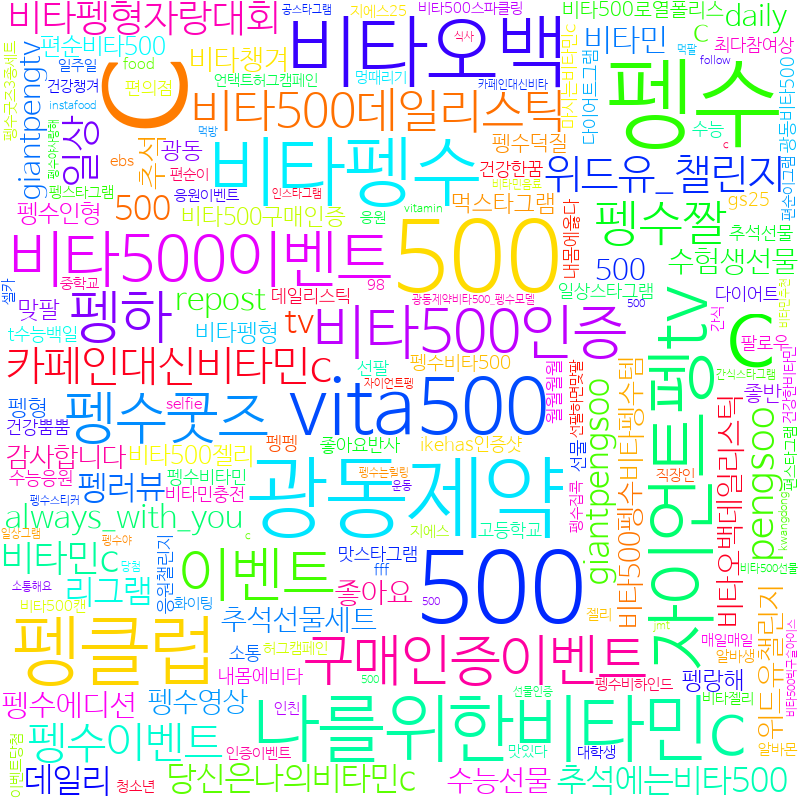

In [78]:
cloud.to_image()

# 2. Embedding

### - LSA

### - tags

In [79]:
tdm.shape

(78341, 8807)

In [80]:
# one hot encoding
import numpy as np

one_hot = np.eye(tdm.shape[1])

In [81]:
words = cv.get_feature_names()

In [82]:
tokens = tags

In [83]:
%%time
doc = np.zeros((1, tdm.shape[1]))

for token in tokens:
    try:
        i = words.index(token)
        doc += one_hot[i]
    except ValueError:
        pass

Wall time: 45 s


In [84]:
from sklearn.decomposition import TruncatedSVD

In [85]:
svd = TruncatedSVD(n_components=1000)

In [86]:
svd.fit(tdm)

TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=5,
             random_state=None, tol=0.0)

In [87]:
svd.components_.shape

(1000, 8807)

In [88]:
word_emb = svd.components_.T

In [89]:
indices = []
target = list(word_count.sort_values('빈도', ascending=False)['단어'][0:100])
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

건강한비타민c 725
펭수 1746
광동제약 757
펭수 7909
비타챙겨 1153
일상 1510
건강뿜뿜 722
마시는비타민c 932
신이나 1302
펭수비타500 1774
내몸에비타 822
건강챙겨얍 724
펭타 1815
힘내세요 1927
비타500주세요 1112
건강음료 723
까꿍 797
할수이따 1872
광동제약 2488
비타오백 4594
비타펭수 4624
vita500 673
펭클럽 8128
나를위한비타민c 2885
자이언트펭tv 6655
비타500이벤트 4502
비타500인증 4508
이벤트 6427
펭수굿즈 7929
펭하 8150
구매인증이벤트 2578
펭수짤 8073
비타500데일리스틱 4457
펭수이벤트 8057
카페인대신비타민c 7507
위드유_챌린지 6275
일상 6548
pengsoo 548
비타펭형자랑대회 4638
비타민c 4562
비타오백 1141
펭러뷰 7888
giantpengsoo 361
데일리 3364
자이언트펭tv 1530
비타500이벤트 1105
리그램 3628
비타펭수 1155
당신은나의비타민c 3251
추석에는비타500 7361
always_with_you 222
나를위한비타민c 807
비타민 4557
추석 7352
repost 589
펭수에디션 8042
비타500인증 1108
비타오백데일리스틱 4597
좋아요 6943
추석선물세트 7358
daily 284
giantpengtv 362
위드유챌린지 6276
수험생선물 5151
구매인증이벤트 767
펭클럽 1814
수능선물 5084
이벤트 1489
펭수영상 8045
펭하 1821
비타펭수템 4634
비타챙겨 4617
비타500펭수 4534
감사합니다 2114
비타500젤리 4514
편순비타5

In [90]:
word_emb = svd.components_.T

In [91]:
from adjustText import adjust_text
from matplotlib import pyplot
from matplotlib import font_manager, rc

In [92]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name)

Wall time: 3min 26s


105

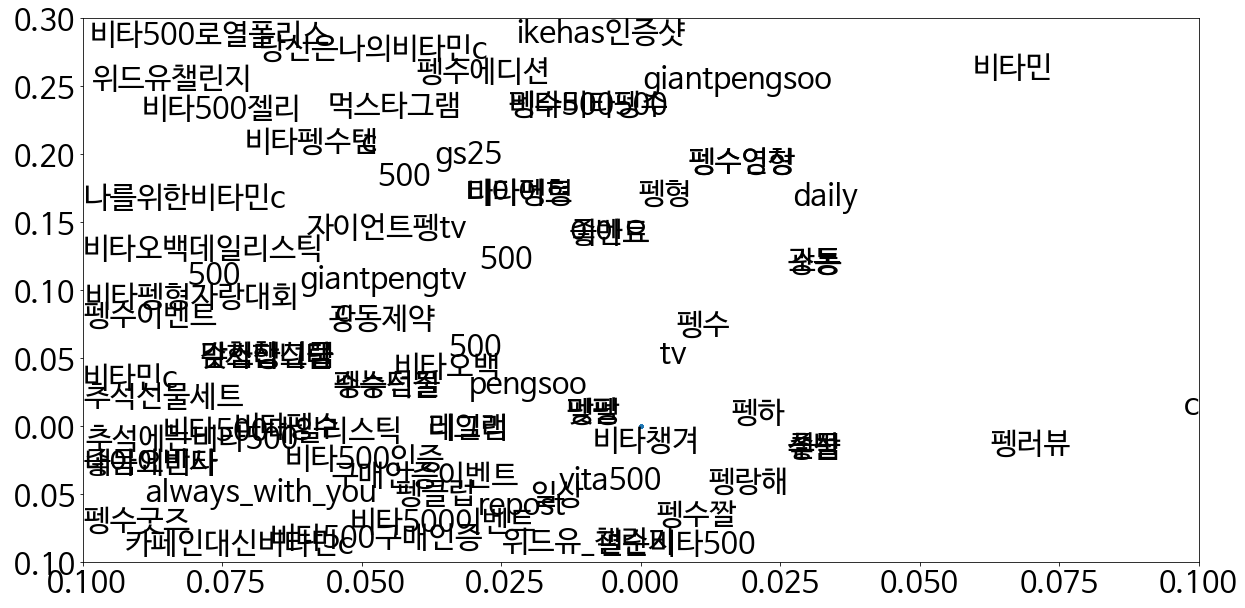

In [93]:
%%time

comp1 = 0
comp2 = 1

pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.plot(word_emb[indices, comp1], word_emb[indices, comp2], '.')

pyplot.xlim(-0.1, 0.1)
pyplot.ylim(-0.1, 0.3)

texts = [pyplot.text(word_emb[i, comp1], word_emb[i, comp2], w) for i, w in zip(indices, target)]

adjust_text(texts)

### - T-SNE

In [94]:
from sklearn.manifold import TSNE

In [95]:
tsne = TSNE()

In [96]:
%%time
pos = tsne.fit_transform(word_emb)

Wall time: 18min 5s


12

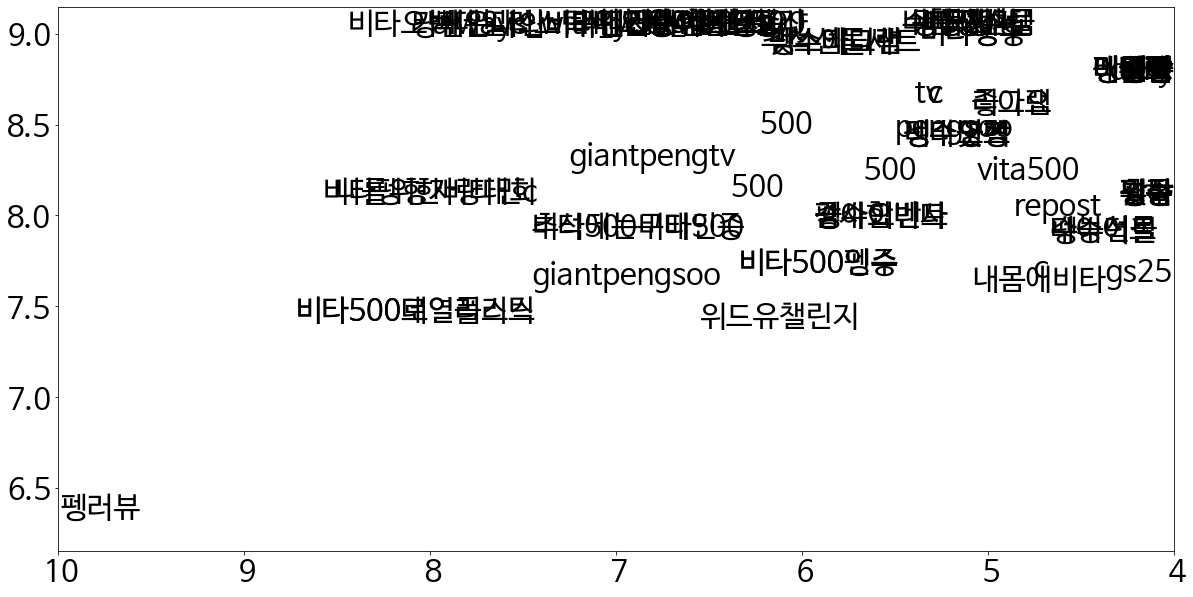

In [97]:
pyplot.rcParams["figure.figsize"] = (20,10)

pyplot.plot(pos[indices, 0], pos[indices, 1], '.')

pyplot.xlim(-10, -4)

texts = [pyplot.text(pos[i, 0], pos[i, 1], w) for i, w in zip(indices, target)]

adjust_text(texts)

### - Word2Vec

In [98]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA

In [99]:
sentences = list(df['Hashtags'])

In [100]:
model = Word2Vec(sentences, size = 1000, min_count = 100, workers = 4, window = 100) # negative, sg

In [101]:
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [102]:
pca = PCA(n_components = 2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

In [103]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name, size = 30)

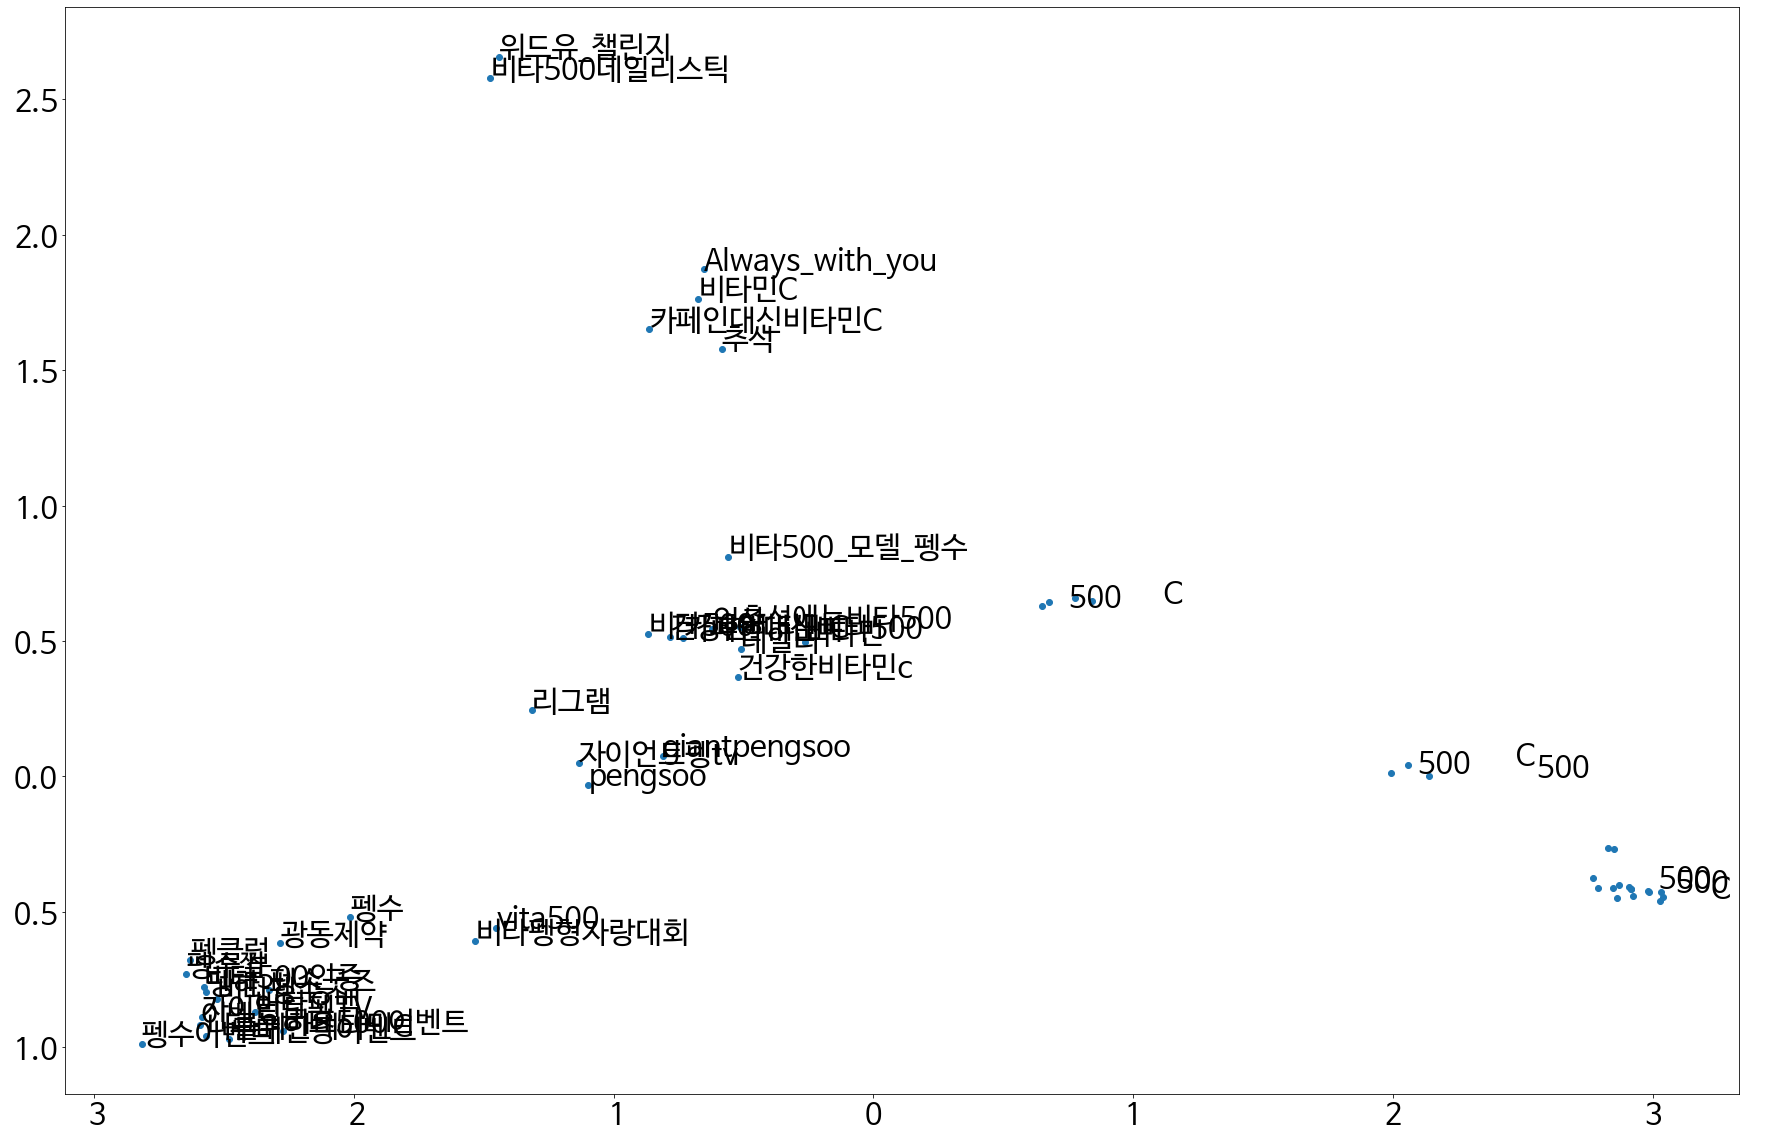

In [104]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [30, 20]
plt.scatter(xs, ys)
for i,v in enumerate(vocabs):
    plt.annotate(v, xy = (xs[i], ys[i]))

# Location 분석

## - Word Cloud

In [53]:
locates = [element for array in list(df.Locates) for element in array]

In [54]:
monster_lc_stop_words = ['error','','south','korea']
cv = CountVectorizer(max_features=10000, stop_words = monster_lc_stop_words)
tdm = cv.fit_transform(locates)
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat 
})

In [55]:
word_count.sort_values('빈도', ascending=False).head()

,단어,빈도
5,busan,15
186,어딘가,12
49,seoul,11
143,부산,6
200,우리집,6


In [56]:
wc = WordCloud(background_color='white',
               width=800, height=800, 
               font_path='NanumBarunGothicLight.ttf',
              colormap = 'hsv', # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
              max_words = 200)

In [57]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()
cloud = wc.fit_words(count_dic)

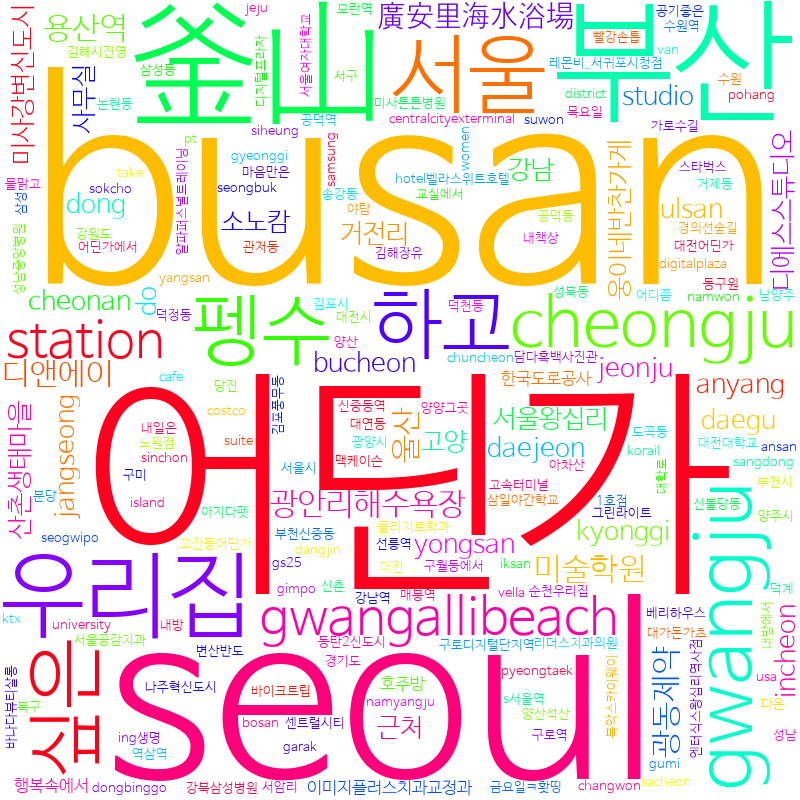

In [58]:
cloud.to_image()

## - Embedding

- LSA

In [59]:
tdm.shape

(230, 250)

In [60]:
# one hot encoding
import numpy as np

one_hot = np.eye(tdm.shape[1])

In [61]:
words = cv.get_feature_names()
tokens = locates

In [62]:
%%time
doc = np.zeros((1, tdm.shape[1]))

for token in tokens:
    try:
        i = words.index(token)
        doc += one_hot[i]
    except ValueError:
        pass

Wall time: 2.99 ms


In [63]:
%%time
svd = TruncatedSVD(n_components=1000)
svd.fit(tdm)

ValueError: n_components must be < n_features; got 1000 >= 250

In [64]:
svd.components_.shape

AttributeError: 'TruncatedSVD' object has no attribute 'components_'

In [ ]:
word_emb = svd.components_.T

In [ ]:
indices = []
target = list(word_count.sort_values('빈도', ascending=False)['단어'][0:100])
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

In [ ]:
word_emb = svd.components_.T

In [ ]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name)

In [ ]:
%%time

comp1 = 0
comp2 = 1

pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.plot(word_emb[indices, comp1], word_emb[indices, comp2], '.')

texts = [pyplot.text(word_emb[i, comp1], word_emb[i, comp2], w) for i, w in zip(indices, target)]

adjust_text(texts)

- T-SNE

In [ ]:
tsne = TSNE()

In [ ]:
%%time
pos = tsne.fit_transform(word_emb)

In [ ]:
pyplot.rcParams["figure.figsize"] = (20,10)

pyplot.plot(pos[indices, 0], pos[indices, 1], '.')

texts = [pyplot.text(pos[i, 0], pos[i, 1], w) for i, w in zip(indices, target)]

adjust_text(texts)

- Word2Vec

In [ ]:
sentences = list(df['Locates'])

In [ ]:
model = Word2Vec(sentences, size = 1000, min_count = 20, workers = 4, window = 100)

In [ ]:
%%time

word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [ ]:
%%time
pca = PCA(n_components = 2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

In [ ]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name, size = 30)

In [ ]:
plt.rcParams['figure.figsize'] = [30, 20]
plt.scatter(xs, ys)
for i,v in enumerate(vocabs):
    plt.annotate(v, xy = (xs[i], ys[i]))